In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import beam_propagation_method as bpm

# Initialize needed parameters (were already provided)

In [7]:
# computational parameters                                                         
z_end   = 200       # propagation distance                                         
lam = 1         # wavelength                                                   
nd = 1.455     # reference index                                              
xa = 50        # size of computational window                                 
Nx = 1251       # number of transverse points                                  
dx = xa/(Nx-1) # transverse step size                                         
                                                                                   
# waveguide parameters                                                             
xb = 2.0       # size of waveguide                                            
n_cladding = 1.45      # cladding index                                           
n_core = 1.46      # core refr. index                                             
                                                                                   
# source width                                                                     
w = 5.0       # Gaussian beam width                                          
                                                                                   
# propagation step size                                                            
dz = 0.5                                                                           
output_step = round(1.0/dz)                                                     
                                                                                   
# create index distribution                                                        
n, x = bpm.waveguide(xa, xb, Nx, n_cladding, n_core)                                   
                                                                                   
# create initial field                                                             
v_in, x = bpm.gauss(xa, Nx, w)                                                         

v_in = v_in/np.sqrt(np.sum(np.abs(v_in)**2)) # normalize power to unity 

v_out, z = bpm.beamprop_CN(v_in, lam, dx, n, nd, z_end, 0.5, 1)

extent = (0, z_end, x[0], x[-1])

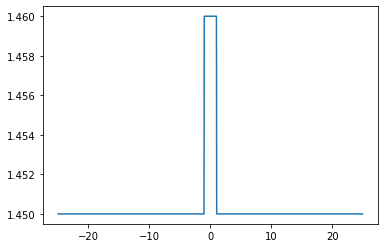

In [8]:
s = 1
plt.plot(x[s:-s], n[s:-s])
#plt.plot(x[s:-s], v_in[s:-s])

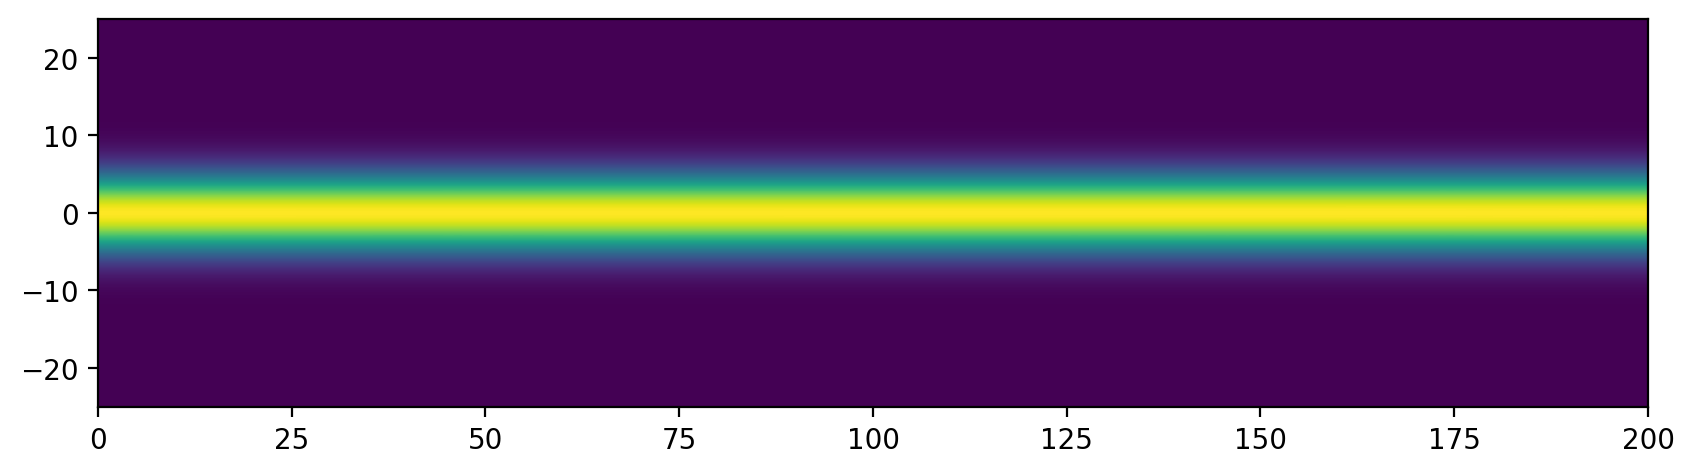

In [9]:
plt.figure(figsize=(10, 6), dpi=200, facecolor='w', edgecolor='k')
plt.imshow(np.transpose(np.abs(v_out)), extent=extent)